In [152]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [153]:
warnings.filterwarnings("ignore")

In [154]:
# Read in data from csv file
df = pd.read_csv('Housing.csv')

In [155]:
# Inspect dataframe columns
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [156]:
# Inspect data
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [157]:
# Split dataframe into data and labels
data = df[df.columns[1:]]
labels = df['price']

In [158]:
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    data[column].replace(['yes', 'no'], [1,0], inplace=True)

data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [159]:
data['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [160]:
data = pd.get_dummies(data, columns=['furnishingstatus'])
data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [161]:
for column in ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

data.head() 
    

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1,0,0
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1,0,0
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0,1,0
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,1,0,0
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,1,0,0


In [162]:
# Split data into training and testing data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 1)

In [163]:
# Create create and train model
model = LinearRegression()
model.fit(train_data, train_labels)

LinearRegression()

In [164]:
# Create predictions based on model
predictions = model.predict(test_data)

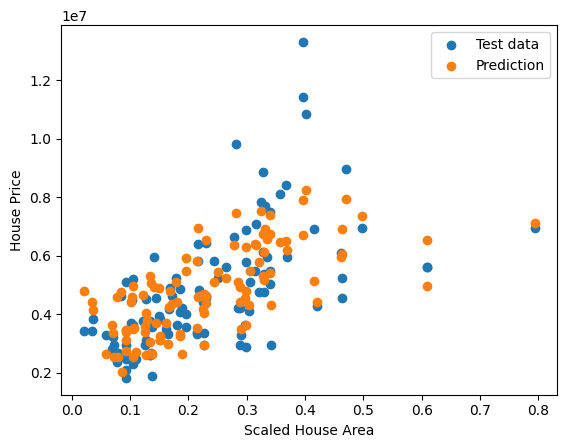

In [168]:
# # Visualise results
plt.scatter(test_data['area'], test_labels)
plt.scatter(test_data['area'], predictions)
plt.xlabel("Scaled House Area")
plt.ylabel("House Price")
plt.legend(['Test data', 'Prediction'])
plt.show()

In [166]:
# Evaluate model metrics
square_error = mean_squared_error(test_labels, predictions)
r2 = r2_score(test_labels, predictions)
print(f'Root Mean Square Error: {square_error**0.5}')
print(f'R2 Score: {r2}')

Root Mean Square Error: 1256464.6307977203
R2 Score: 0.6240462333164765
